In [1]:
## Overview: housing and real estate market is one of the markets which is one of the major contributors in the world’s economy
## A US-based housing company named Surprise Housing has decided to enter the Australian market. 
## The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

## 1. Problem Statement: 
## b) required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Target Variable: SalePrice(Continous Variable)

In [2]:
## Lets import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
train= pd.read_csv("train.csv")
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [4]:
test= pd.read_csv("test.csv")
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [5]:
df = pd.concat([train, test])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [7]:
## Here we can see there are lots of non null value. I am going to treat this on basis of no. of and data type of non null values.
## First of all I am going to delete those column where the number of null value is more than 50%.
## Lets remove those columns where number of null value is too high to be treated. Here I am removing those columns which has null values more than 50%.
df=df.drop("Alley", axis=1)
df=df.drop("PoolQC", axis=1)
df=df.drop("Fence", axis=1)
df=df.drop("MiscFeature", axis=1)
df.shape

(1460, 77)

In [8]:
## We can see there is null value in LotFrontage the above data....
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
## Lets fill null value in columns having less than tha null values.

df["LotFrontage"] = df["LotFrontage"].fillna(value=df["LotFrontage"].mean())
df["MasVnrType"]=df["MasVnrType"].fillna(df["MasVnrType"].mode()[0])
df["MasVnrArea"] = df["MasVnrArea"].fillna(value=df["MasVnrArea"].mean())
df["BsmtQual"]=df["BsmtQual"].fillna(df["BsmtQual"].mode()[0])
df["BsmtCond"]=df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtExposure"]=df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])
df["BsmtFinType1"]=df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(value=df["BsmtFinSF1"].mean())
df["BsmtFinType2"]=df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df["FireplaceQu"]=df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"]=df["GarageType"].fillna(df["GarageType"].mode()[0])
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])
df["GarageFinish"]=df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"]=df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"]=df["GarageCond"].fillna(df["GarageCond"].mode()[0])

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,70.049958,4928,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000.0
1,889,20,3.0,95.000000,15865,1.0,0.0,3.0,0.0,4.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000.0
2,793,60,3.0,92.000000,9920,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790.0
3,110,20,3.0,105.000000,11751,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000.0
4,422,20,3.0,70.049958,16635,1.0,0.0,3.0,0.0,2.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,3.0,78.000000,10206,1.0,3.0,3.0,0.0,4.0,...,0,0,0,0,0,10,2008,8.0,4.0,NaN
288,1048,20,3.0,57.000000,9245,1.0,1.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2008,8.0,4.0,NaN
289,17,20,3.0,70.049958,11241,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,700,3,2010,8.0,4.0,NaN
290,523,50,4.0,50.000000,5000,1.0,3.0,3.0,0.0,0.0,...,36,0,0,0,0,10,2006,8.0,4.0,NaN


In [11]:
df["SalePrice"] = df["SalePrice"].fillna(value=df["SalePrice"].mean())
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])


In [12]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("SalePrice", axis=1)
y=df['SalePrice']

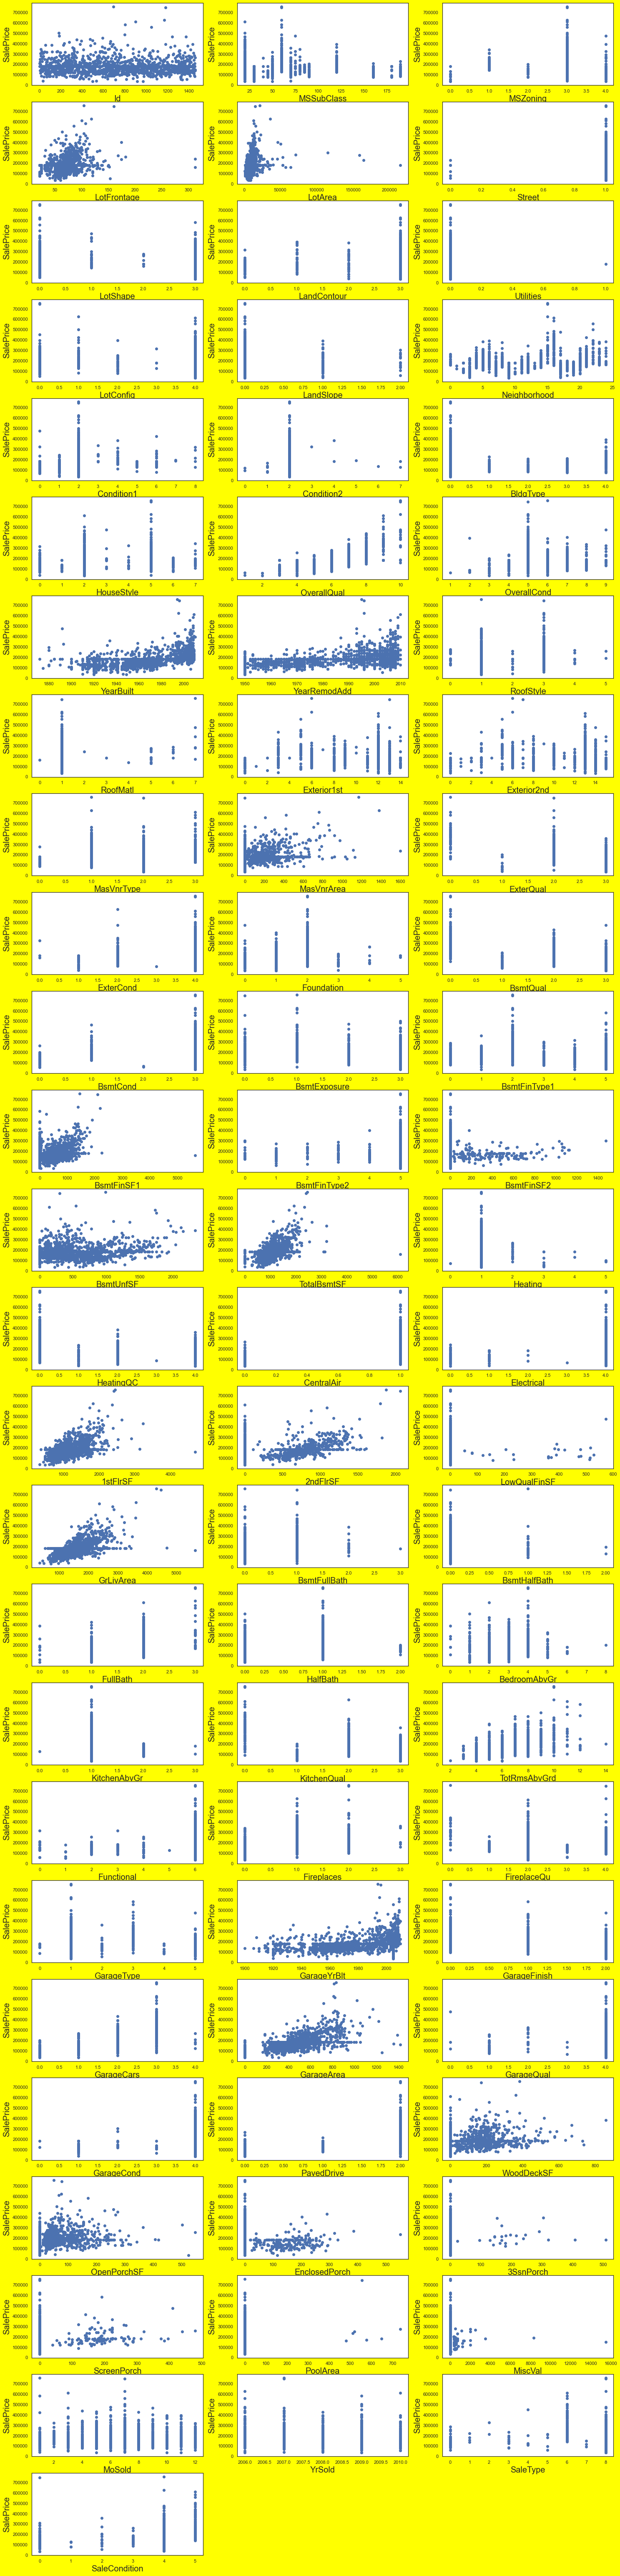

In [13]:
plt.figure(figsize=(25,130),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=90:
        ax=plt.subplot(30,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('SalePrice',fontsize=20)
        
        plotnumber+=1
        
plt.show()

In [14]:
df=df.drop("Id", axis=1)
df=df.drop("Utilities", axis=1)
df=df.drop("Street", axis=1)
df=df.drop("PoolArea", axis=1)

In [15]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("SalePrice", axis=1)
y=df['SalePrice']

In [16]:
print('Correlation of different features of our dataset with quality:')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['SalePrice'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with quality:
MSSubClass : -0.0539
MSZoning : -0.1194
LotFrontage : 0.2951
LotArea : 0.2003
LotShape : -0.2224
LandContour : 0.0295
LotConfig : -0.0547
LandSlope : 0.0142
Neighborhood : 0.1778
Condition1 : 0.0950
Condition2 : 0.0293
BldgType : -0.0582
HouseStyle : 0.1826
OverallQual : 0.7095
OverallCond : -0.0593
YearBuilt : 0.4592
YearRemodAdd : 0.4573
RoofStyle : 0.1718
RoofMatl : 0.1534
Exterior1st : 0.0967
Exterior2nd : 0.0889
MasVnrType : 0.0069
MasVnrArea : 0.4181
ExterQual : -0.5632
ExterCond : 0.1048
Foundation : 0.3286
BsmtQual : -0.5563
BsmtCond : 0.0446
BsmtExposure : -0.2414
BsmtFinType1 : -0.0824
BsmtFinSF1 : 0.3292
BsmtFinType2 : 0.0289
BsmtFinSF2 : -0.0092
BsmtUnfSF : 0.1962
TotalBsmtSF : 0.5365
Heating : -0.0916
HeatingQC : -0.3657
CentralAir : 0.2234
Electrical : 0.2081
1stFlrSF : 0.5318
2ndFlrSF : 0.2976
LowQualFinSF : -0.0303
GrLivArea : 0.6357
BsmtFullBath : 0.1914
BsmtHalfBath : -0.0099
FullBath : 0.4972
HalfBath : 0

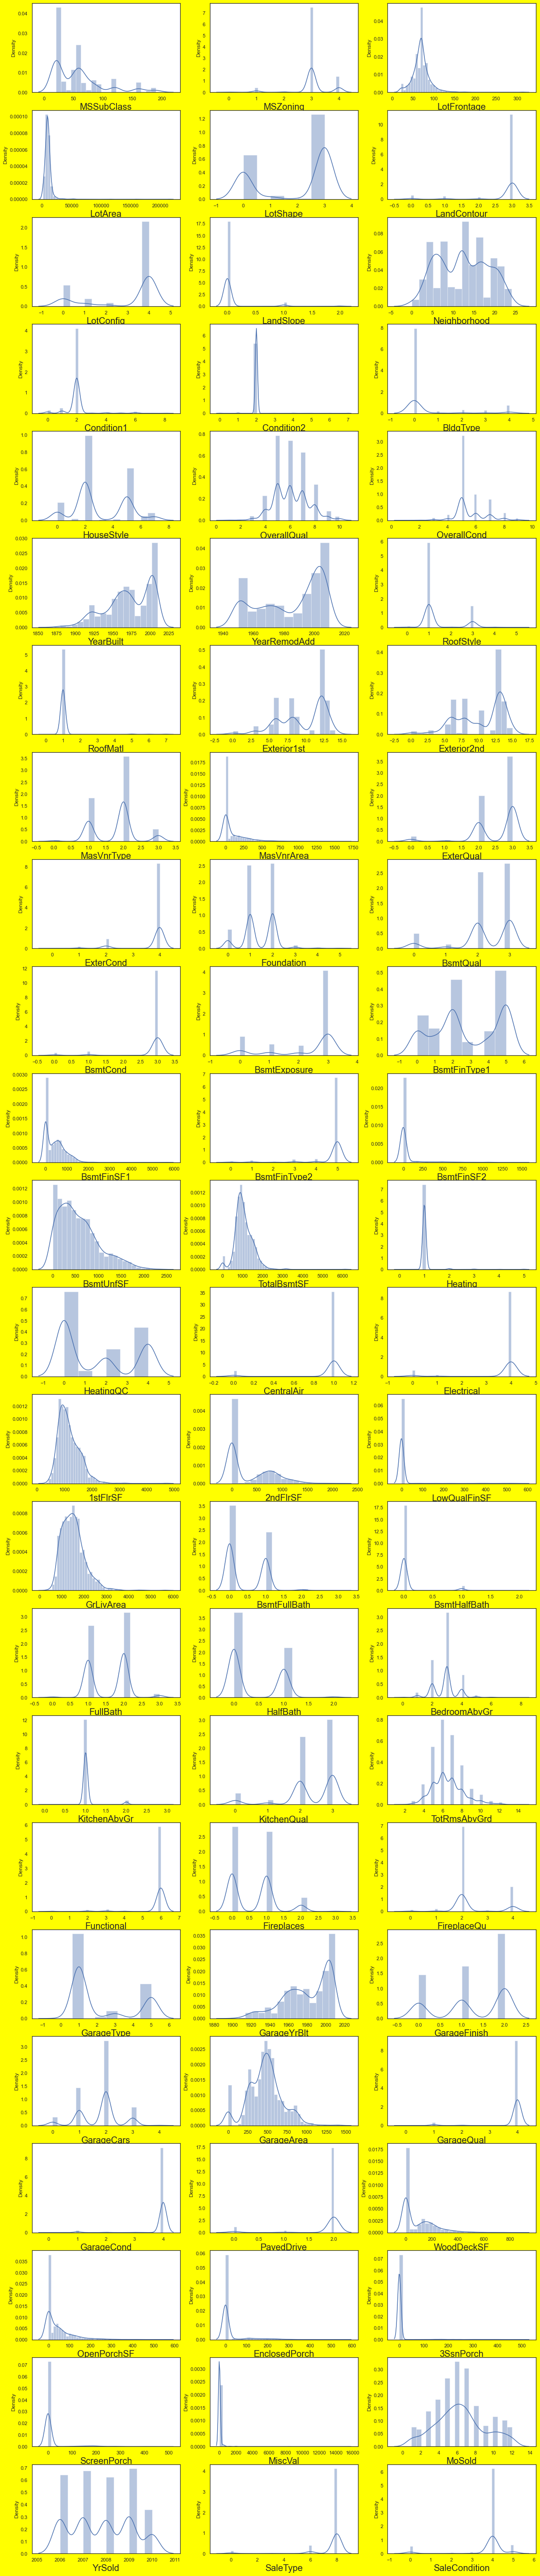

In [17]:
## Lets see how data is distributed.
plt.figure(figsize=(20,130),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=90:
        ax=plt.subplot(30,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        plotnumber+=1
        
plt.show()

In [18]:
df.skew()

MSSubClass        1.407657
MSZoning         -1.735395
LotFrontage       2.384950
LotArea          12.207688
LotShape         -0.610175
                   ...    
MoSold            0.212053
YrSold            0.096269
SaleType         -3.868638
SaleCondition    -2.741167
SalePrice         2.183940
Length: 73, dtype: float64

In [19]:
## We can see there are many skewness in different columns like in BusinessTravel, DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel, TotalWorkingYears , YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.
## Lets treat skewness of required columns with continous data.
df['MSSubClass']=np.sqrt(df['MSSubClass'])
df['LotFrontage']=np.sqrt(df['LotFrontage'])
df['LotArea']=np.sqrt(df['LotArea'])
df['MasVnrArea']=np.sqrt(df['MasVnrArea'])
df['BsmtFinSF1']=np.sqrt(df['BsmtFinSF1'])
df['BsmtFinSF2']=np.sqrt(df['BsmtFinSF2'])
df['BsmtUnfSF']=np.sqrt(df['BsmtUnfSF'])
df['TotalBsmtSF']=np.sqrt(df['TotalBsmtSF'])
df['1stFlrSF']=np.sqrt(df['1stFlrSF'])
df['2ndFlrSF']=np.sqrt(df['2ndFlrSF'])
df['GrLivArea']=np.sqrt(df['GrLivArea'])
df['GarageArea']=np.sqrt(df['GarageArea'])
df['WoodDeckSF']=np.sqrt(df['WoodDeckSF'])
df['OpenPorchSF']=np.sqrt(df['OpenPorchSF'])
df['EnclosedPorch']=np.sqrt(df['EnclosedPorch'])
df['3SsnPorch']=np.sqrt(df['3SsnPorch'])
df['ScreenPorch']=np.sqrt(df['ScreenPorch'])

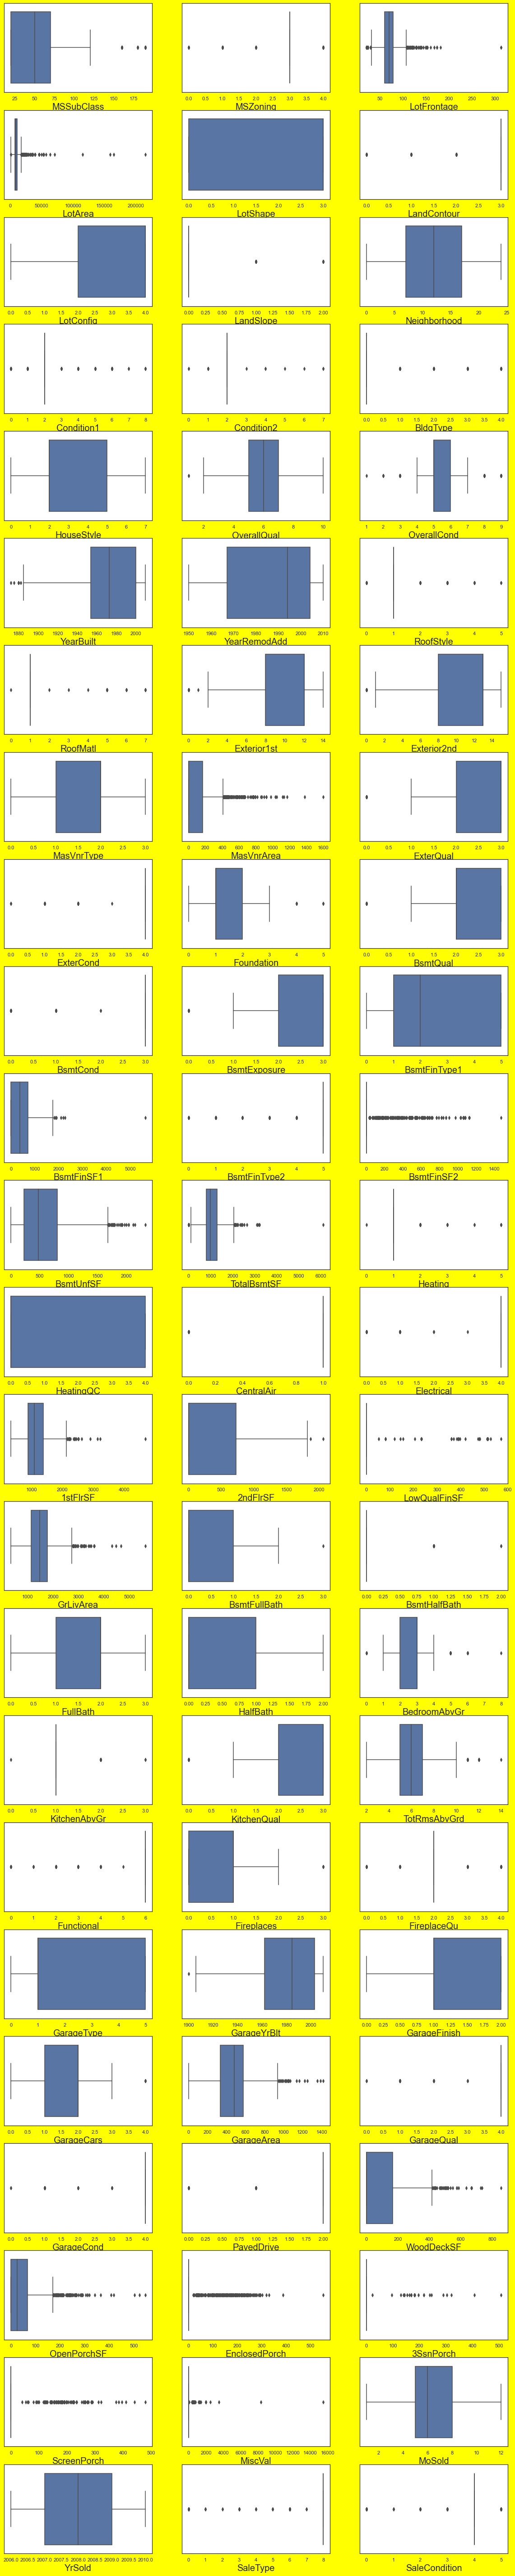

In [20]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,130),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=90:
        ax=plt.subplot(30,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [21]:
## we can see outliers in different columns
q1= df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

In [22]:
## I am not treating those column which has outliers.
MSSubClass= (q3.MSSubClass+(1.5*iqr.MSSubClass))
MSSubClass
index= np.where(df['MSSubClass']>MSSubClass)
index
df= df.drop(df.index[index])
df.shape

(1460, 73)

In [23]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
LotFrontage= (q3.LotFrontage+(1.5*iqr.LotFrontage))
LotFrontage
index= np.where(df['LotFrontage']>LotFrontage)
index
df= df.drop(df.index[index])
df.shape

(1402, 73)

In [24]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
MasVnrArea= (q3.MasVnrArea+(1.5*iqr.MasVnrArea))
MasVnrArea
index= np.where(df['MasVnrArea']>MasVnrArea)
index
df= df.drop(df.index[index])
df.shape

(1395, 73)

In [25]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
BsmtFinSF2= (q3.BsmtFinSF2+(1.5*iqr.BsmtFinSF2))
BsmtFinSF2
index= np.where(df['BsmtFinSF2']>BsmtFinSF2)
index
df= df.drop(df.index[index])
df.shape

(1174, 73)

In [26]:
## I am not treating those column which has monetry value as this is going to create impact on the result because it has real values.
TotalBsmtSF= (q3.TotalBsmtSF+(1.5*iqr.TotalBsmtSF))
TotalBsmtSF
index= np.where(df['TotalBsmtSF']>TotalBsmtSF)
index
df= df.drop(df.index[index])
df.shape

(1168, 73)

In [27]:
GarageArea= (q3.GarageArea+(1.5*iqr.GarageArea))
GarageArea
index= np.where(df['GarageArea']>GarageArea)
index
df= df.drop(df.index[index])
df.shape



(1163, 73)

In [28]:
OpenPorchSF= (q3.OpenPorchSF+(1.5*iqr.OpenPorchSF))
OpenPorchSF
index= np.where(df['OpenPorchSF']>OpenPorchSF)
index
df= df.drop(df.index[index])
df.shape


(1159, 73)

In [29]:
EnclosedPorch= (q3.EnclosedPorch+(1.5*iqr.EnclosedPorch))
EnclosedPorch
index= np.where(df['EnclosedPorch']>EnclosedPorch)
index
df= df.drop(df.index[index])
df.shape

(936, 73)

In [30]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,14.938618,MSSubClass
1,31.704134,MSZoning
2,19.301610,LotFrontage
3,3.373054,LotArea
4,3.636490,LotShape
...,...,...
67,1.081383,MiscVal
68,6.774925,MoSold
69,42690.232105,YrSold
70,27.921178,SaleType


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.linear_model import  LinearRegression

lr=LinearRegression()

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state{i}, The training accuracy is :-{r2_score(y_train,lr_predict_train)}')
    print(f'At random state{i}, The test accuracy is :-{r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state0, The training accuracy is :-0.6769016736941891
At random state0, The test accuracy is :-0.6314218070987513


At random state1, The training accuracy is :-0.6854777342732908
At random state1, The test accuracy is :-0.5010275048673413


At random state2, The training accuracy is :-0.6871207722277111
At random state2, The test accuracy is :-0.599962627001934


At random state3, The training accuracy is :-0.6892406050075801
At random state3, The test accuracy is :-0.45864741041502954


At random state4, The training accuracy is :-0.6854591773694065
At random state4, The test accuracy is :-0.5730270090698728


At random state5, The training accuracy is :-0.7003057230878025
At random state5, The test accuracy is :-0.4847568188070438


At random state6, The training accuracy is :-0.7001790297403352
At random state6, The test accuracy is :-0.5127906163734978


At random state7, The training accuracy is :-0.6970619729303944
At random state7, The test accuracy is :-0.58838304469

In [34]:
##Splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)

In [35]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.6812032607722773


In [37]:
##Lets check how well model fits the trained data
from sklearn.metrics import r2_score

print('r2_score:',r2_score(lr_predict,y_test))

r2_score: 0.5223551790646721


In [38]:
## ##Lets check how well model fits the test data
lr.score(x_train,y_train)

0.6812032607722773

In [39]:
y_pred= lr.predict(x_test)
y_pred

array([227929.96973798, 250294.95198622, 132600.39031112, 126680.12324695,
       232017.9041582 , 117417.26031475, 242031.08661493, 126684.98818499,
       224832.99480292, 219763.41841755, 190317.89460331, 166520.33407242,
       128604.46428591, 141368.44962188, 226967.86839097, 147076.69692684,
       167032.73529828, 134216.25777077, 210257.07371314, 101259.12952214,
       108973.57705378, 141162.66727649, 130354.72280859, 262641.74998623,
       154027.78681054, 204853.74110339, 150399.88293347, 125096.41938351,
       230317.61459212, 190508.15768495, 201334.53357944, 107795.34083444,
       157090.48536176, 266217.51844222, 259743.66889526, 292103.09030468,
       204926.89736058, 260797.2117823 , 177604.90126895, 151524.87087502,
       153750.09183536, 184222.84280509, 273095.79644455, 193552.11728578,
       193389.06635432, 141816.63034781,  97812.28610188, 192464.14396942,
       347983.23169934, 321168.71757604, 279696.08575159, 193597.77140268,
       145601.92397284, 1

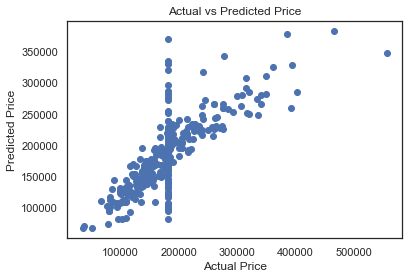

In [40]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual vs Predicted Price")
plt.show()

In [41]:
## Doing Model Evaluation by Mean square Error
mean_squared_error(y_test,y_pred)

1685048053.5434983

In [42]:
mean_absolute_error(y_test,y_pred)

28525.270080594833

In [43]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

41049.336822213074

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

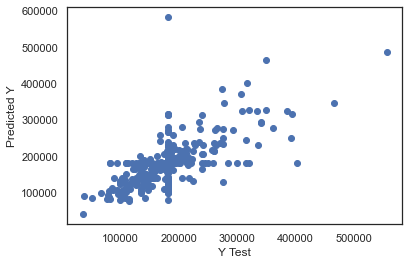

In [45]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [46]:
## We can see we got a straight line. so it is better model than LinearRegression. 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 34277.12783172382
MSE: 2730515158.6300797
RMSE: 52254.331481993715


In [47]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

,Y Test,Pred
57,190000.000000,206599.521318
887,320000.000000,265802.050899
6,181477.005993,149261.501259
1164,108000.000000,133537.051558
820,263435.000000,244857.230899


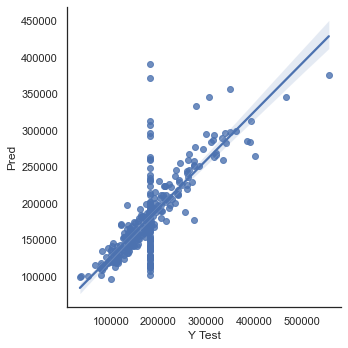

In [48]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 26552.395978579938
MSE: 1575108798.561067
RMSE: 39687.64037532424


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
from sklearn import metrics
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
z=GridSearchCV(ls,parameters)
z.fit(x_train,y_train)
print(z.best_params_)

{'alpha': 10, 'random_state': 0}


In [51]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.615784508312337
MSE: 1684736496.6065414
MAE: 28522.179843345657
RMSE: 41045.54173849508


In [52]:
rd=Ridge(alpha=10,solver='saga')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.5292814484112782
MSE: 2064041509.6431491
MAE: 33547.84494772357
RMSE: 45431.72360414195


In [53]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
z_=GridSearchCV(rd,parameters)
z_.fit(x_train,y_train)
print(z_.best_params_)


{'alpha': 10, 'solver': 'auto'}


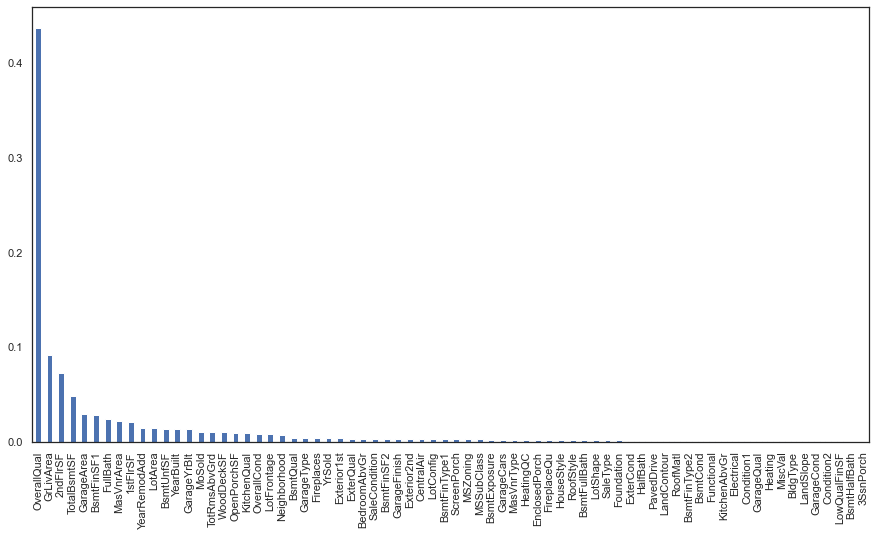

In [54]:
pd.Series(rdr.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [55]:
## Conclusions
##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
## In this project we can see that min RMSE is of Random Forest hence this can be a good model option 
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use Linear, Decision Tree and other applicable and required models to fine tune the predictions.
## On the basis of above project we can see Random Forest has highest Accuracy value.
## In this project we have also seen importance of each features in ascending order.